*** Counter Strike Project ***
* in this project I will predict who will be the winner .. Counter Team Or Terrorist Team
* I will do EDA
* Need to reduce the dimension
* The I will make model like logistics and Decision Tree Or Random Forest

Problem Statement:

Create a predictive model to predict hte winner of each round in the give game

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
#EDA
# Checking the null values
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
#checking duplicate value
df.duplicated().sum()

4962

In [ ]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(117448, 97)

In [ ]:
# Outliers -- Skipping outliers as it is part of a game

In [ ]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['map'] = le.fit_transform(df['map'])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])

In [ ]:
# Data proccessing using for loop
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [ ]:
df[['bomb_planted', 'map', 'round_winner']].dtypes

,0
bomb_planted,int64
map,int64
round_winner,int64


In [ ]:
# Need to standarized the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X = df.iloc[:, : -1]  # selecting all columns except target columns
y = df.iloc[:, -1]   # selecting the target columns

In [ ]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
y

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


In [ ]:
# fitting the df data and standarizing the df data
scale_df = sc.fit_transform(X)
scale_df

array([[ 1.50968479, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 1.15326858, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       [ 0.02596377, -1.4096717 , -1.4131151 , ..., -0.82928168,
        -0.16321956, -0.15480545],
       ...,
       [ 0.38106478,  0.88093134,  1.69091536, ...,  2.16182079,
        -0.16321956, -0.15480545],
       [ 0.00529651,  0.88093134,  1.69091536, ...,  1.56360029,
        -0.16321956, -0.15480545],
       [-0.37047176,  0.88093134,  1.69091536, ...,  0.9653798 ,
        -0.16321956, -0.15480545]])

In [ ]:
# As we can see the data has 97 columns, then there can a be overfitting issue . So we need to reduce
#the dimension using Feature Selection or Feature Extraction

In [ ]:
# Feature selection / Feature Extraction

# I will use LDA for feature selection instead of feature extraction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [ ]:
LDA_data = LDA.fit(scale_df, y)
LDA_data

LinearDiscriminantAnalysis()

In [ ]:
LDA.coef_
# co efficiant value says that how much importance is hold each columns

array([[ 1.42085107e-01, -1.76219946e-02,  1.44486071e-02,
        -8.60506286e-02,  2.47130943e-01, -4.52567544e-01,
         3.29982924e-01, -6.05056813e-01,  6.36072745e-01,
        -2.09913706e-01,  1.64604826e-01,  2.47758411e-02,
         8.17702396e-02, -3.59129346e-02, -2.07855793e-01,
         3.84028898e-01, -1.86948537e-01,  6.11234173e-01,
        -1.98857061e-01,  3.74942705e-02, -3.04270371e-01,
         2.48465497e-01, -5.90045322e-16, -1.81909613e-03,
         1.65604645e-02, -6.49693007e-03, -4.53018504e-03,
         1.53116286e-02, -1.35982810e-01,  4.51639915e-02,
        -4.63853314e-16,  2.03487944e-02, -4.91445564e-02,
         1.37683454e-01,  2.36155447e-02, -1.76086108e-01,
         1.02057680e-02,  9.71109521e-18, -9.38422784e-02,
         4.50521297e-02, -4.55252271e-01,  1.05865587e-01,
        -1.04790022e-02,  1.10199520e-01, -1.63913029e-02,
         7.02271132e-03, -1.32347293e-02,  3.53867987e-02,
         6.48328192e-03, -6.29293877e-03, -1.14826067e-0

In [ ]:
# here I will remove the exponential value and positive/negative sysbol to see the values properly

lda_coef = np.exp(np.abs(LDA.coef_))
lda_coef

array([[1.15267474, 1.01777818, 1.01455349, 1.08986151, 1.28034675,
        1.57234407, 1.39094438, 1.83135625, 1.88904752, 1.23357161,
        1.17892715, 1.02508531, 1.08520644, 1.03656559, 1.23103563,
        1.46818787, 1.20556524, 1.84270421, 1.22000757, 1.03820605,
        1.35563553, 1.28205659, 1.        , 1.00182075, 1.01669835,
        1.00651808, 1.00454046, 1.01542945, 1.1456622 , 1.04619941,
        1.        , 1.02055724, 1.05037218, 1.14761222, 1.0238966 ,
        1.19254074, 1.01025802, 1.        , 1.09838649, 1.04608239,
        1.57657106, 1.11167244, 1.0105341 , 1.11650081, 1.01652638,
        1.00704743, 1.0133227 , 1.03602036, 1.00650434, 1.00631278,
        1.12167832, 1.03637972, 1.        , 1.00696163, 1.01560732,
        1.01379809, 1.02292652, 1.01815506, 1.        , 1.00602516,
        1.        , 1.01454856, 1.00582189, 1.01100567, 1.22977851,
        1.74564164, 1.08742719, 1.02776903, 1.04814473, 1.09481271,
        1.01743839, 1.00072568, 1.02759341, 1.01

In [ ]:
# converting this 2D data to 1D data
lda_coef = lda_coef.flatten()
lda_coef

array([1.15267474, 1.01777818, 1.01455349, 1.08986151, 1.28034675,
       1.57234407, 1.39094438, 1.83135625, 1.88904752, 1.23357161,
       1.17892715, 1.02508531, 1.08520644, 1.03656559, 1.23103563,
       1.46818787, 1.20556524, 1.84270421, 1.22000757, 1.03820605,
       1.35563553, 1.28205659, 1.        , 1.00182075, 1.01669835,
       1.00651808, 1.00454046, 1.01542945, 1.1456622 , 1.04619941,
       1.        , 1.02055724, 1.05037218, 1.14761222, 1.0238966 ,
       1.19254074, 1.01025802, 1.        , 1.09838649, 1.04608239,
       1.57657106, 1.11167244, 1.0105341 , 1.11650081, 1.01652638,
       1.00704743, 1.0133227 , 1.03602036, 1.00650434, 1.00631278,
       1.12167832, 1.03637972, 1.        , 1.00696163, 1.01560732,
       1.01379809, 1.02292652, 1.01815506, 1.        , 1.00602516,
       1.        , 1.01454856, 1.00582189, 1.01100567, 1.22977851,
       1.74564164, 1.08742719, 1.02776903, 1.04814473, 1.09481271,
       1.01743839, 1.00072568, 1.02759341, 1.01792206, 1.03981

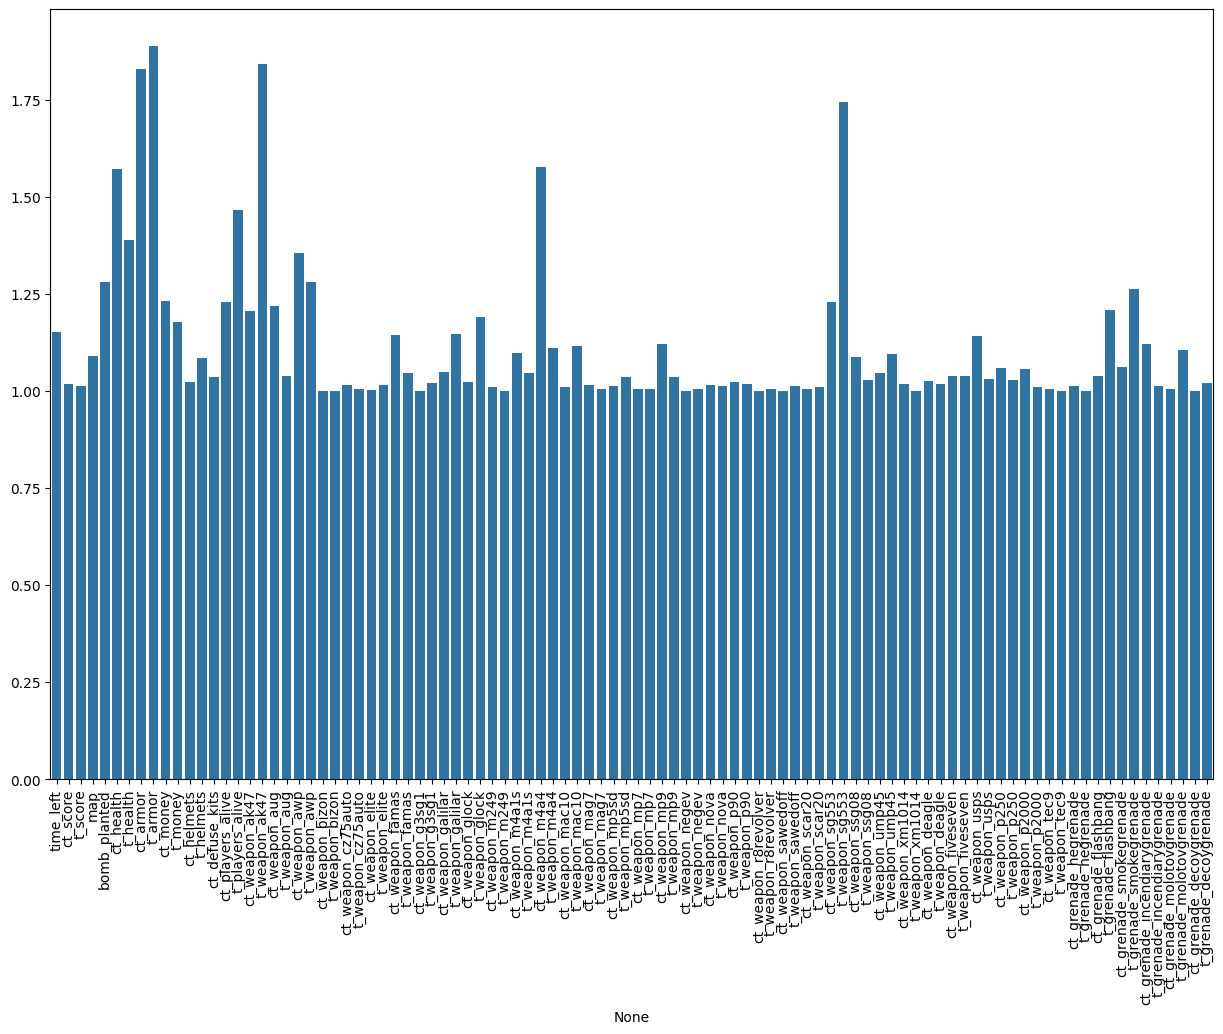

In [ ]:
# plotting a bar plot with respect of the importance of columns

plt.figure(figsize = (15,10))
sns.barplot(y = lda_coef, x = X.columns)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# making a dataframe using coef data and 96 column name to find top columns which is getting highest score

feature_score = pd.DataFrame({'X_columns': X.columns, 'Feature_score': lda_coef})
feature_score

,X_columns,Feature_score
0,time_left,1.152675
1,ct_score,1.017778
2,t_score,1.014553
3,map,1.089862
4,bomb_planted,1.280347
...,...,...
91,t_grenade_incendiarygrenade,1.013546
92,ct_grenade_molotovgrenade,1.005935
93,t_grenade_molotovgrenade,1.105847
94,ct_grenade_decoygrenade,1.000101


In [ ]:
#getting these 20 columns
top_20_column = feature_score.nlargest(20, 'Feature_score').reset_index()
top_20_column

,index,X_columns,Feature_score
0,8,t_armor,1.889048
1,17,t_weapon_ak47,1.842704
2,7,ct_armor,1.831356
3,65,t_weapon_sg553,1.745642
4,40,ct_weapon_m4a4,1.576571
5,5,ct_health,1.572344
6,15,t_players_alive,1.468188
7,6,t_health,1.390944
8,20,ct_weapon_awp,1.355636
9,21,t_weapon_awp,1.282057


In [ ]:
important_cols = top_20_column['X_columns'].values

In [ ]:
new_X = X[important_cols]
new_X

,t_armor,t_weapon_ak47,ct_armor,t_weapon_sg553,ct_weapon_m4a4,ct_health,t_players_alive,t_health,ct_weapon_awp,t_weapon_awp,bomb_planted,t_grenade_smokegrenade,ct_money,ct_players_alive,ct_weapon_sg553,ct_weapon_aug,t_grenade_flashbang,ct_weapon_ak47,t_weapon_glock,t_money
0,0.0,0.0,0.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,0.0,4000.0,5.0,0.0,0.0,0.0,0.0,5.0,4000.0
1,300.0,0.0,400.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,2.0,600.0,5.0,0.0,0.0,0.0,0.0,5.0,650.0
2,200.0,0.0,294.0,0.0,0.0,391.0,4.0,400.0,0.0,0.0,0,2.0,750.0,4.0,0.0,0.0,0.0,0.0,4.0,500.0
3,200.0,0.0,294.0,0.0,0.0,391.0,4.0,400.0,0.0,0.0,0,0.0,750.0,4.0,0.0,0.0,0.0,0.0,3.0,500.0
4,0.0,0.0,192.0,0.0,0.0,500.0,5.0,500.0,0.0,0.0,0,0.0,18350.0,5.0,0.0,0.0,0.0,0.0,5.0,10750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,359.0,1.0,195.0,2.0,1.0,200.0,4.0,242.0,0.0,1.0,1,1.0,100.0,2.0,0.0,0.0,2.0,0.0,2.0,5950.0
122406,175.0,0.0,95.0,1.0,1.0,500.0,5.0,500.0,0.0,1.0,0,0.0,11500.0,5.0,0.0,0.0,2.0,0.0,5.0,23900.0
122407,475.0,2.0,495.0,1.0,1.0,500.0,5.0,500.0,0.0,1.0,0,5.0,1200.0,5.0,0.0,0.0,4.0,0.0,4.0,6700.0
122408,475.0,2.0,495.0,2.0,1.0,500.0,5.0,500.0,0.0,1.0,0,3.0,1200.0,5.0,0.0,0.0,5.0,0.0,4.0,6700.0


In [ ]:
#Model building process start from here

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_X , y , test_size = 0.3, random_state = 42)

In [ ]:
  ##Applying Logistics Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()

In [ ]:
log_model = lr.fit(x_train, y_train)
log_model

LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
from sklearn.metrics import *
accuracy_score(y_test, y_pred)

0.7489428125443451

In [ ]:
##Applying Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred= rf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8512558535547041

In [ ]:
# I am getting good result using Random Forest